## Data preparation and descriptive plots
This notebook contains
1. Descriptive plots of the data
2. additional data preprocessing in preparation for model comparison

### Descriptive plots

In [1]:
# For data wrangling
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load and preprocess data

In [2]:
data = pd.read_csv("/work/Exam/data_w_patients.csv",sep=",")
data_old = data.copy()
data.head()

,Unnamed: 0,Afdelinger,Aldersgruppe,Stilling_niv1,Fravaeraarsag_gruppe,Koen,Antal_Timer,Antal_Personer,Timestamp,Year,Month,Day,is_weekend,weekday,is_holiday,is_school_holiday,Antal_timer_yesterday,Antal_Loentimer,Antal_Kontakter
0,0,akutafdelingen,20-30,Lægepersonale (8M_01),Sygefravær,Kvinde,26.0,2,2021-01-02,2021,1,2,1,5,0,0,10.0,1173.233835,120.0
1,1,akutafdelingen,20-30,Lægepersonale (8M_01),Sygefravær,Kvinde,0.0,1,2021-01-03,2021,1,3,1,6,0,0,26.0,1173.233835,97.0
2,2,akutafdelingen,20-30,Lægepersonale (8M_01),Sygefravær,Kvinde,10.0,1,2021-01-04,2021,1,4,0,0,0,0,0.0,1173.233835,133.0
3,3,akutafdelingen,20-30,Lægepersonale (8M_01),Sygefravær,Kvinde,10.0,1,2021-01-10,2021,1,10,1,6,0,0,10.0,1173.233835,74.0
4,4,akutafdelingen,20-30,Lægepersonale (8M_01),Sygefravær,Kvinde,10.0,1,2021-01-19,2021,1,19,0,1,0,0,10.0,1173.233835,130.0


In [3]:
# Replace age groups with dummy variable
# --- sorting aldersgruppe to make the replacement make sense
X = data.sort_values(by='Aldersgruppe')

# --- Create an empty dictionary to store the vocabulary
vocabulary = {}
colums_to_change = ['Stilling_niv1', 'Aldersgruppe', 'Koen', 'Afdelinger']

# --- Iterate over each column in the DataFrame, excluding the specified columns
for col in X.columns:
    if col in colums_to_change:  # Check if the column is not in the list of excluded columns
        unique_values = X[col].unique()
        # --- Iterate over unique values in each column
        for i, value in enumerate(unique_values, start=1):
            # --- If the value is not already in the vocabulary, add it with a new code
            if value not in vocabulary:
                vocabulary[value] = i

# --- Print the vocabulary
for value, code in vocabulary.items():
    print(f"{value}: {code}")

# --- Replace all observation with the codes in the vocabulary
X = X.replace(vocabulary)
X

blodprøver og biokemi (sr_klbk): 1
driftsafdelingen (sr_draf): 2
elever (sr_soel): 3
ernæring: 4
børn og unge: 5
ortopædkirurgi: 6
mave- og tarmkirurgi: 7
praksislæger (sr_refu): 8
operation og intensiv: 9
center for patientrapporterede oplysninger (sr_ambl): 10
røntgen og skanning: 11
staben (sr_admc): 12
socialmedicin og rehabilitering (sr_ksmr): 13
projekter (sr_proj): 14
akutafdelingen: 15
kvindesygdomme og fødsler: 16
medicinsk afdeling: 17
neurologi, fysio- og ergoterapi: 18
kræftafdelingen: 19
hjertesygdomme: 20
flytteorganisationen (sr_flyt): 21
nuklearmedicin: 22
urinvejskirurgi: 23
arbejdsmedicin: 24
øre-, næse- og halskirurgi: 25
øjensygdomme: 26
øvrige (sr_øvr): 27
æ - gamle/udgåede (sr_æ): 28
timelønnede/vagtlisten (sr_tml): 29
hospitalsledelsen, rhg (sr_hl): 30
10-20: 1
20-30: 2
30-40: 3
40-50: 4
50-60: 5
60-70: 6
70-80: 7
Øvr.sundh.pers (8M_04): 1
ServiceTeknisk (8M_05): 2
Øvr.personale (8M_08): 3
Plejepersonale (8M_02): 4
Lægepersonale (8M_01): 5
Adm.personale (8M_03): 

/tmp/ipykernel_751/654636906.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace(vocabulary)


,Unnamed: 0,Afdelinger,Aldersgruppe,Stilling_niv1,Fravaeraarsag_gruppe,Koen,Antal_Timer,Antal_Personer,Timestamp,Year,Month,Day,is_weekend,weekday,is_holiday,is_school_holiday,Antal_timer_yesterday,Antal_Loentimer,Antal_Kontakter
16627,16627,1,1,1,Sygefravær,1,9.00,1,2021-01-07,2021,1,7,0,3,0,0,9.0,429.404655,0.0
25706,25706,2,1,2,Sygefravær,2,7.40,1,2023-05-17,2023,5,17,0,2,0,0,7.4,1193.571270,0.0
25705,25705,2,1,2,Sygefravær,2,7.40,1,2023-05-16,2023,5,16,0,1,0,0,7.4,1193.571270,0.0
25704,25704,2,1,2,Sygefravær,2,7.40,1,2023-05-15,2023,5,15,0,0,0,0,7.4,1193.571270,0.0
25703,25703,2,1,2,Sygefravær,2,7.40,1,2023-05-01,2023,5,1,0,0,0,0,0.0,1193.571270,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121885,121885,13,7,5,Sygefravær,1,3.00,1,2023-06-21,2023,6,21,0,2,0,0,3.0,127.771138,0.0
121884,121884,13,7,5,Sygefravær,1,3.00,1,2023-06-20,2023,6,20,0,1,0,0,3.0,127.771138,0.0
121883,121883,13,7,5,Sygefravær,1,3.00,1,2023-06-19,2023,6,19,0,0,0,0,0.0,127.771138,0.0
9545,9545,24,7,5,Sygefravær,1,0.00,1,2021-11-20,2021,11,20,1,5,0,0,7.4,44.176129,0.0


In [4]:
# Drop NAs
data = X.dropna(axis = 0)

# Drop timestamp and reason for absence (which is the same across all datapoints)
data_subset = data.drop(["Unnamed: 0","Fravaeraarsag_gruppe","Timestamp","Antal_Personer"], axis = 1)
data_subset.head()

,Afdelinger,Aldersgruppe,Stilling_niv1,Koen,Antal_Timer,Year,Month,Day,is_weekend,weekday,is_holiday,is_school_holiday,Antal_timer_yesterday,Antal_Loentimer,Antal_Kontakter
16627,1,1,1,1,9.0,2021,1,7,0,3,0,0,9.0,429.404655,0.0
25706,2,1,2,2,7.4,2023,5,17,0,2,0,0,7.4,1193.571270,0.0
25705,2,1,2,2,7.4,2023,5,16,0,1,0,0,7.4,1193.571270,0.0
25704,2,1,2,2,7.4,2023,5,15,0,0,0,0,7.4,1193.571270,0.0
25703,2,1,2,2,7.4,2023,5,1,0,0,0,0,0.0,1193.571270,0.0


#### Heatmap: Correlations between features

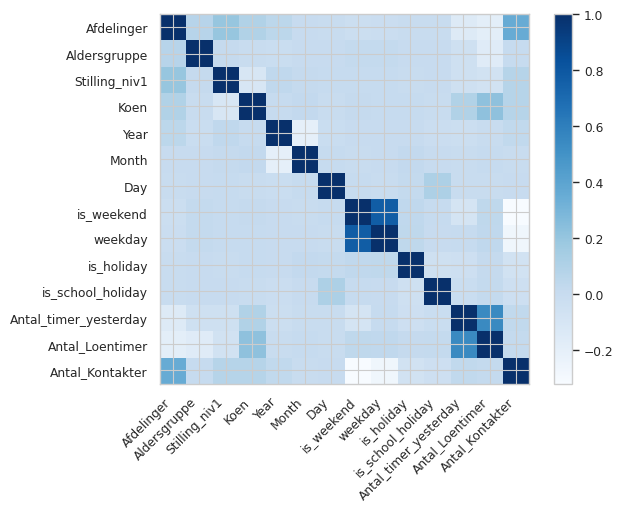

<Figure size 640x480 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
from sklearn import datasets  
import pandas as pd 

matrix = data_subset.drop('Antal_Timer', axis = 1)
matrix = matrix.corr()

#plotting correlation matrix 
plt.imshow(matrix, cmap='Blues')

#adding colorbar 
plt.colorbar()

#extracting variable names 
variables = []
for i in matrix.columns:
  variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(matrix)), variables)

# Display the plot
plt.show()

plt.savefig('/work/Exam/descriptive_plots/heatmap.png')

#### Aggregated hours of absence per staff type

In [7]:
# Include only necessary columns
data_agg = data_old.filter(['Stilling_niv1','Antal_Timer','Timestamp'])
data_agg['Timestamp'] = pd.to_datetime(data_agg['Timestamp'])

# Group data to only have one datapoint per department per day
grouped = data_agg.groupby(["Timestamp","Stilling_niv1"])
sum_antal_timer = grouped["Antal_Timer"].sum()
sum_df = sum_antal_timer.to_frame().reset_index(level =["Stilling_niv1","Timestamp"])

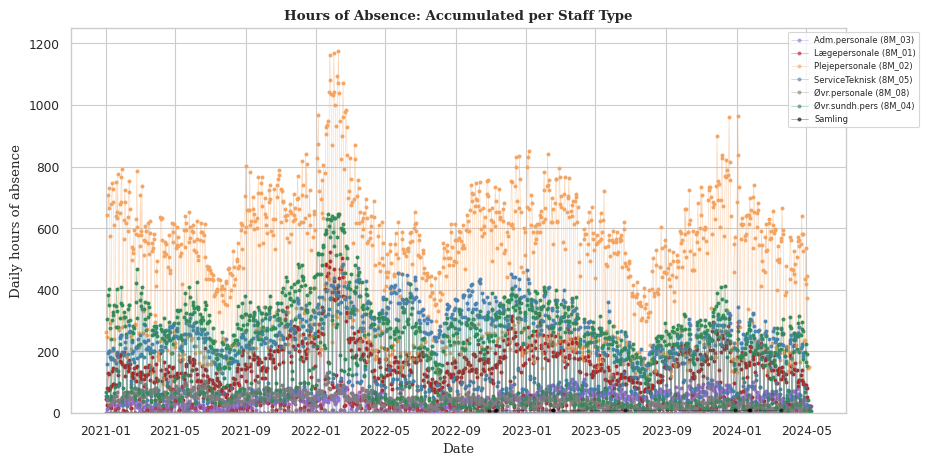

In [12]:
# Plot 
# Set figure size
plt.figure(figsize=(10, 5))

pos_list = sum_df['Stilling_niv1'].unique()
# Plot each hours of absence across time for each department

# Specify colors
color_dict = {'Adm.personale (8M_03)': 'mediumpurple', 'Lægepersonale (8M_01)':'firebrick',
    'Plejepersonale (8M_02)':'sandybrown', 'Øvr.sundh.pers (8M_04)':'seagreen',
    'ServiceTeknisk (8M_05)':'steelblue', 'Øvr.personale (8M_08)':'grey', 'Samling':'black'
    }

for pos in pos_list:
    sub = sum_df.loc[sum_df['Stilling_niv1'] == pos]
    color = color_dict.get(pos)

    plt.scatter(sub['Timestamp'],sub['Antal_Timer'], color = color, label=f'{pos}', alpha = .9, s=3)
    plt.plot(sub['Timestamp'],sub['Antal_Timer'], label=f'{pos}', color = color, alpha = .5, linewidth = 0.4,marker ='o', markersize = 2)
    
    
    # Add titles and labels
    hfont = {'fontname':'DejaVu Serif'}
    plt.title(f'Hours of Absence: Accumulated per Staff Type',**hfont,horizontalalignment="center",weight='bold')
    plt.xlabel('Date',**hfont)
    plt.ylabel('Daily hours of absence',**hfont)
    plt.ylim((0,1250))

    # Display legend
    # Display legend for line plots only
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='upper right', prop={'size': 6}, bbox_to_anchor=(1.1, 1))

    # Set theme
    sns.set_context('paper')
    sns.set_theme(context='paper',style = "whitegrid")

    # Show the plot
    plt.grid(True)

plt.savefig('/work/Exam/descriptive_plots/Acc_pos_plot.png')

### Prepare data for model training and testing

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Create X and y variable
X = data_subset.drop("Antal_Timer",axis = 1)
y = data_subset["Antal_Timer"]

In [35]:
# Split data into test, train and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

# If we want a validation set
# let's further split the training set into a training and a validation set (15%)
#X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  #y_train,
                                                  #test_size=X_test.shape[0] / X_train.shape[0],  
                                                  #random_state=42)


In [36]:
# Scale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

datasets = {
    'X_train': X_train,
    'X_test': X_test
    #'X_val': X_val,
}

# Apply scaling in a loop, but only to float columns
for key, dataset in datasets.items():
    # Identify columns that are of float type
    float_columns = dataset.select_dtypes(include=['float64', 'float32']).columns

    # Scale only the float columns
    datasets[key][float_columns] = scaler.fit_transform(dataset[float_columns]) if key == 'X_train' \
        else scaler.transform(dataset[float_columns])

X_train_scaled = datasets['X_train']
X_test_scaled = datasets['X_test']
#X_val_scaled = datasets['X_val']



In [41]:
X_train_scaled.to_csv("X_train_scaled.csv",index=False)
X_test_scaled.to_csv('X_test_scaled.csv',index=False)

y_train.to_csv("y_train.csv",index=False)
y_test.to_csv("y_test.csv",index=False)

# If we want a validation set
#X_val_scaled.to_csv('X_val_scaled.csv',index=False)
#y_val.to_csv("y_val.csv",index=False)